# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import data and modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import glob as glob

In [3]:
data = pd.read_csv('all_data.csv')

## Inspect data
2 qualitative fields (life expectancy, gdp); 2 categorical fields (country, year)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### Create calculated fields

In [5]:
data['gdp_billions'] = data['GDP'] / 1000000000

### Explore *year*

Data is available for the years 2000 - 2015

In [6]:
data['Year'].value_counts()

2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
2008    6
2007    6
2006    6
2005    6
2004    6
2003    6
2002    6
2001    6
2000    6
Name: Year, dtype: int64

### Explore *country*

Data is available for United States of America, Mexico, Germany, Chile, Zimbabwe, and China   

In [7]:
data['Country'].value_counts()

China                       16
Chile                       16
Mexico                      16
Zimbabwe                    16
United States of America    16
Germany                     16
Name: Country, dtype: int64

## Explore *gdp*

In [8]:
# min gdp (billions)
data['gdp_billions'].min()

4.4157028

In [9]:
# max gdp (billions)
data['gdp_billions'].max()

18100.0

In [10]:
# mean gdp (billions)
data['gdp_billions'].mean()

3880.4985707683954

In [11]:
# median gdp (billions)
data['gdp_billions'].median()

1280.22

In [52]:
# mean gdp by country
data.groupby(by=['Country']).mean()

,Year,Life expectancy at birth (years),GDP,gdp_billions
Country,,,,
Chile,2007.5,78.94375,1.697888e+11,169.788845
China,2007.5,74.26250,4.957714e+12,4957.713750
Germany,2007.5,79.65625,3.094776e+12,3094.775625
Mexico,2007.5,75.71875,9.766506e+11,976.650625
United States of America,2007.5,78.06250,1.407500e+13,14075.000000
Zimbabwe,2007.5,50.09375,9.062580e+09,9.062580


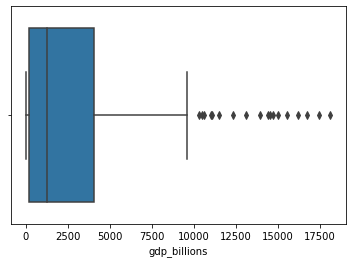

In [12]:
# boxplot showing distribution of gdp
sns.boxplot(x='gdp_billions', data=data)
plt.show()

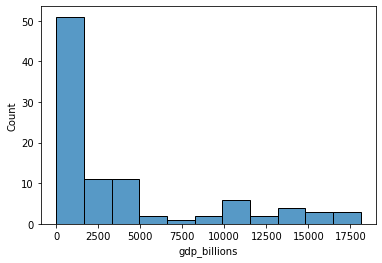

In [53]:
# histogram showing distribution of gdp
sns.histplot(data['gdp_billions'])
plt.show()

### Explore *life epectancy*

In [14]:
# min life expectancy
data['Life expectancy at birth (years)'].min()

44.3

In [15]:
# max life expectancy
data['Life expectancy at birth (years)'].max()

81.0

In [16]:
# median life expectancy
data['Life expectancy at birth (years)'].median()

76.75

In [17]:
# mean life expectancy
data['Life expectancy at birth (years)'].mean()

72.78958333333334

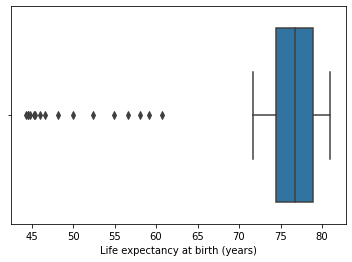

In [18]:
# boxplot showing distribution of life expectancy
sns.boxplot(x='Life expectancy at birth (years)', data=data)
plt.show()

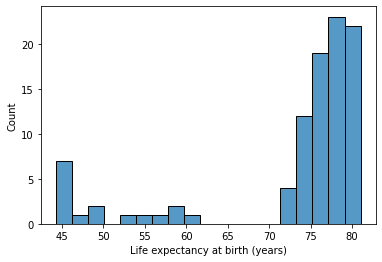

In [23]:
# histogram showing distribution of life expectancy
sns.histplot(data['Life expectancy at birth (years)'])
plt.show()

## Explore relationships between the variables

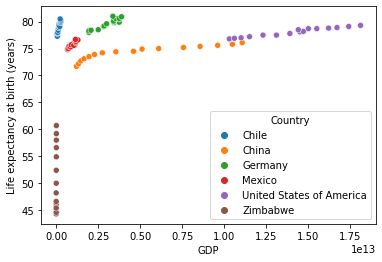

In [20]:
# scatter plot showing relationship between gdp and life expectancy
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = data, hue = 'Country')
plt.show()

The scatterplot shows that gdp has a positive relationship with life expectancy within individual countries.
It is difficult to determine  the relationship between gdp and life expectancy in Zimbabwe - need to investigate this trend more closely.

It is difficult to determine how strong the overall relationship between gdp and life expectancy is given the small sample size of 6 countries. Including all available countries would allow us to analyze this relationship. Exporing the relationship between gdp per capita and life expectancy would also be useful.

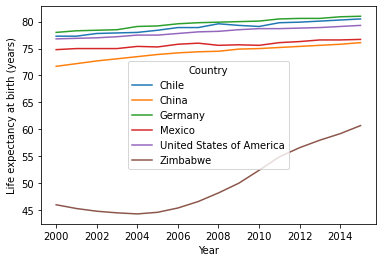

In [21]:
# lineplot showing life expectancy over time
sns.lineplot(data=data, x="Year", y='Life expectancy at birth (years)', hue = 'Country')
plt.show()

All countries saw their life expectancy increase between 2000 and 2015. Zimbabwe saw the most dramatic increase - from 46 to 61.

## Investigate Zimbabwe

In [26]:
# filter df to include only Zimbabwe
zimbabwe = data[data['Country'] == 'Zimbabwe']

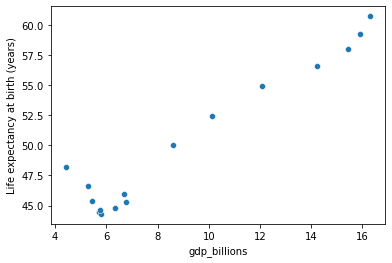

In [31]:
# scatterplot showing relationship between gdp (billions) and life expectancy in Zimbabwe
sns.scatterplot(x = 'gdp_billions', y = 'Life expectancy at birth (years)', data = zimbabwe)
plt.show()

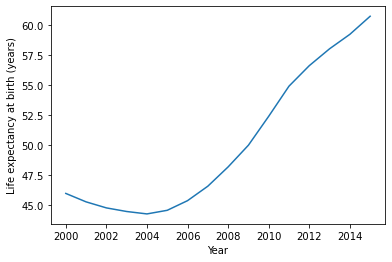

In [37]:
# lineplot showing life expectancy over time in Zimbabwe
sns.lineplot(data=zimbabwe, x="Year", y='Life expectancy at birth (years)')

In [45]:
# calculate rate of increase in life expectancy between 2004 and 2015
le_increase = (zimbabwe['Life expectancy at birth (years)'].max() - zimbabwe['Life expectancy at birth (years)'].min()) / zimbabwe['Life expectancy at birth (years)'].min()

Zimbabwe's life expectancy declined between 2000 and 2004, before rising by 37% to 61 in 2015.

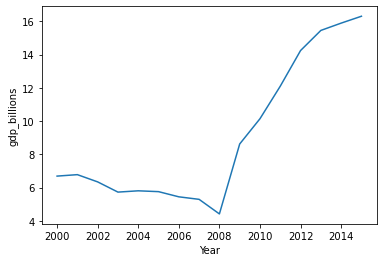

In [50]:
# lineplot showing gdp (billions) over time in Zimbabwe
sns.lineplot(data=zimbabwe, x="Year", y='gdp_billions')

In [51]:
# calculate rate of increase in gdp between 2008 and 2015
gdp_increase = (zimbabwe['gdp_billions'].max() - zimbabwe['gdp_billions'].min()) / zimbabwe['gdp_billions'].min()

Zimbabwe saw a decrease in gdp from 2000 - 2008, followed by a 269% increase between 2009 and 2015.

Zimbabwe's gdp and life expectancy both declined between 2000 and 2004, but life expectancy began to tick back up in 2005, while GDP continued to decline until 2009.